In [514]:
#inline charting magic command
%matplotlib inline
#dependencies
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd
import statistics as st
import numpy as np
import scipy.stats as sts

In [515]:
#files to load
city_data_to_load ="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"

In [516]:
#read csv files into a df
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [517]:
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [518]:
#check for rows with null values in city_data
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [519]:
#check for rows with null values - alternate method
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [520]:
#check type of data in the df
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [521]:
#detemine unique values "type" in city df
city_data_df["type"].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [522]:
#count for each city-type
urban=sum(city_data_df["type"]=="Urban")
suburban=sum(city_data_df["type"]=="Suburban")
rural=sum(city_data_df["type"]=="Rural")
print(urban,suburban,rural)

66 36 18


In [523]:
#check for rows with null values in ride_data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [524]:
#check for rows with null values - alt method
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [525]:
#check types of data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [526]:
#merge ride and city data on 'city'
pyber_data_df=pd.merge(ride_data_df,city_data_df,how ="left",on=["city","city"])
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [527]:
#create df for totals by type of city - this is for Urban
urban_cities_df=pyber_data_df[pyber_data_df['type']=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [528]:
#create df for totals by type of city - these are for suburban and rural
suburban_cities_df=pyber_data_df[pyber_data_df['type']=="Suburban"]
rural_cities_df=pyber_data_df[pyber_data_df['type']=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [529]:
#number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [530]:
#number of rides for suburban and ruran cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [531]:
#average fare for each urban city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [532]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]


In [533]:
#average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [534]:
#average number of drivers for each suburban and rural cities
suburban_driver_count=suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count=rural_cities_df.groupby(["city"]).mean()["driver_count"]

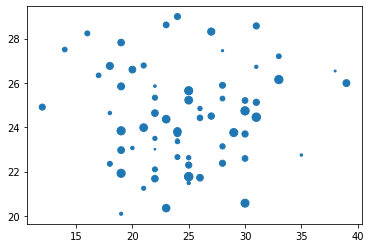

In [535]:
plt.scatter(urban_ride_count,
            urban_avg_fare,

            s=urban_driver_count)

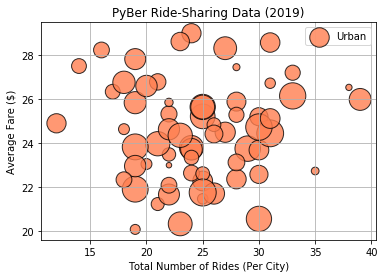

In [536]:
#formatting chart and adding axis labels and titles for urban cities
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()


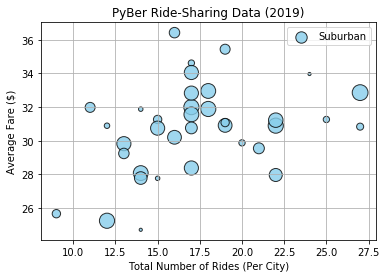

In [537]:
#formatting chart and adding axis labels and titles for suburban cities
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()


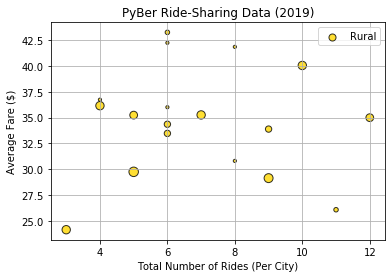

In [538]:
#formatting chart and adding axis labels and titles for rural cities
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()

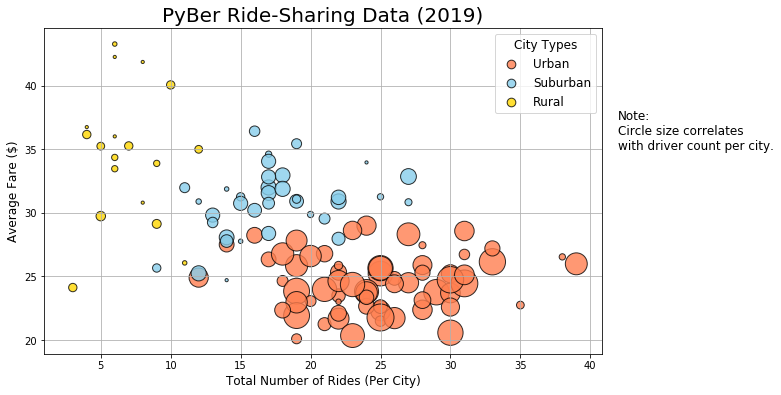

In [539]:
#combine scatter plaot for all types of cities
#set fig frame size
plt.figure(figsize=(10,6))

#create scatter plto that combines urban, suburban, rural scatter plots
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

#add title, axis, and labels
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#scale uniformly and add legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#add text label about circle size
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

#save figure as png in designated folder
plt.savefig("analysis/Fig1.png")

#show the plot
plt.show()

In [540]:
#descriptive stats for urban df
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [541]:
#descriptive stats for suburban df
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [542]:
#descriptive stats for rural df
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [543]:
#descriptive stats for urban rides
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [544]:
#descriptive stats for suburban rides
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [545]:
#descriptive stats for rural rides
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [546]:
#mean of the ride count by city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [547]:
#median of the ride count by city type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [548]:
#mode of the ride count for the urban cities
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [549]:
#mode of the ride count for the suburban cities
suburban_ride_count.mode()

0    17
dtype: int64

In [550]:
#mode of the ride count for the rural cities
rural_ride_count.mode()

0    6
dtype: int64

In [551]:
#measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [552]:
#measures of central tendency for the ride count for the suburban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [553]:
#measures of central tendency for the ride count for the rural cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [554]:
#create Series for fares for the urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()


0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [555]:
#create Series for fares for the suburban and ruralcities
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [556]:
#stats for fares in urban cities using numpy and scipy (for mode)
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")



The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [557]:
#stats for fares in urban cities using numpy and scipy (for mode)
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
median_suburban_fares=np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")


The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [558]:
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [559]:
#create Series for driver_count for the urban cities
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [560]:
#create Series for driver_count for the suburban and ruralcities
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

In [561]:
#stats for driver_count in urban cities using numpy and scipy (for mode)
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_drivers:.2f}.")
median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_drivers:.2f}.")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_drivers}.")

The mean driver count for urban cities is 36.68.
The median driver count for urban cities is 37.00.
The mode driver count for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [562]:
#stats for driver_count in suburban cities using numpy and scipy (for mode)
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_drivers:.2f}.")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban cities is {median_suburban_drivers:.2f}.")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_drivers}.")

The mean driver count for suburban cities is 13.71.
The median driver count for suburban cities is 16.00.
The mode driver count for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [563]:
#stats for driver_count in rural cities using numpy and scipy (for mode)
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural cities is {mean_rural_drivers:.2f}.")
median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural cities is {median_rural_drivers:.2f}.")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_drivers}.")

The mean driver count for rural cities is 4.30.
The median driver count for rural cities is 4.00.
The mode driver count for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


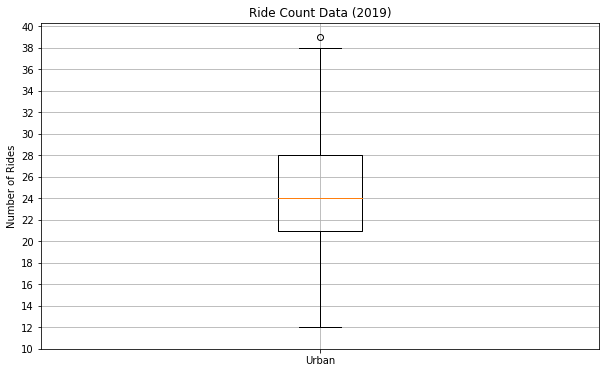

In [564]:
#box-whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

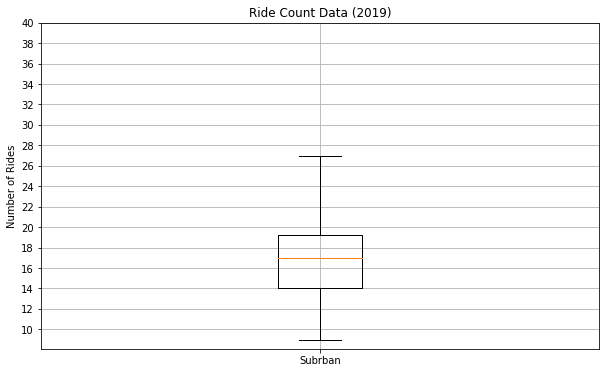

In [565]:
#box-whisker plot for the suburban cities ride count
x_labels = ["Subrban"]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(suburban_ride_count, labels=x_labels)
#add title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

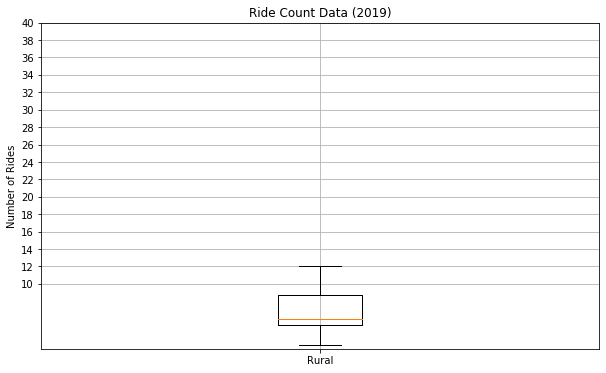

In [566]:
#box-whisker plot for the rural cities ride count
x_labels = ["Rural"]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(rural_ride_count, labels=x_labels)
#add title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

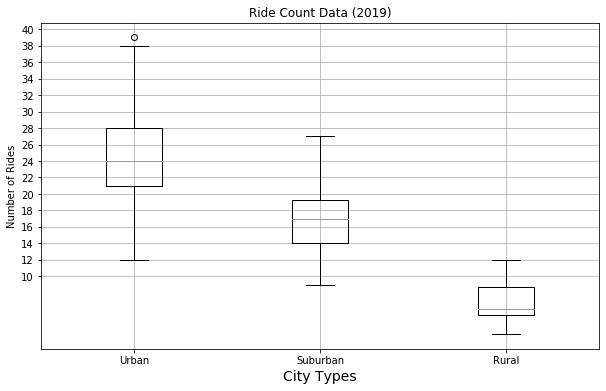

In [567]:
#box-whisker plot for ride count for all city-types
ride_count_data=[urban_ride_count,suburban_ride_count,rural_ride_count]
x_labels=['Urban','Suburban','Rural']
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ride_count_data, labels=x_labels)
#add title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
ax.set_xlabel("City Types",fontsize=14)
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

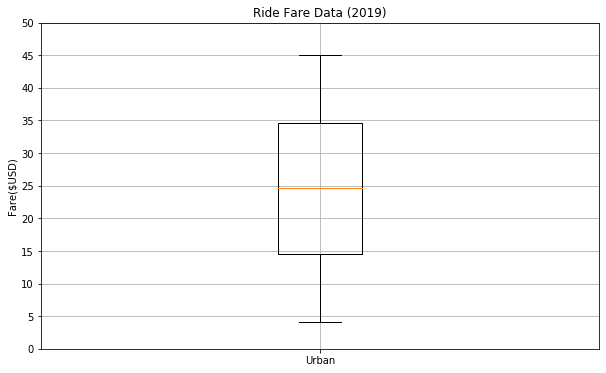

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [568]:
#box-and-whisker plot for the urban fares
fig, ax = plt.subplots(figsize=(10, 6))
x_labels = ["Urban"]
ax.boxplot(urban_fares, labels=x_labels)
#add title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

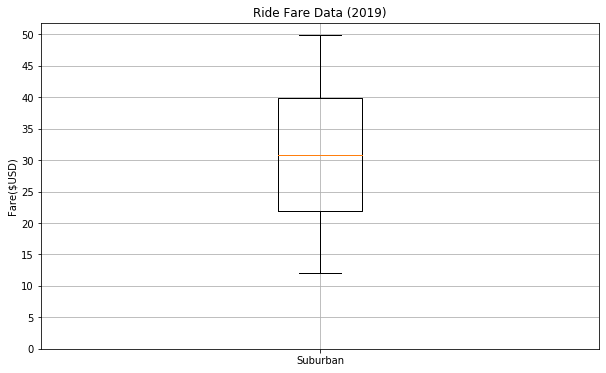

count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [569]:
#create box-whisker plot for suburban fares
figure,ax=plt.subplots(figsize=(10, 6))
x_labels=["Suburban"]
ax.boxplot(suburban_fares,labels=x_labels)
#add title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
suburban_fares.describe()

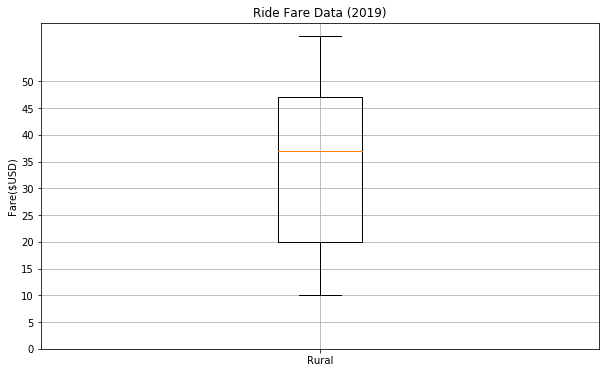

count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [570]:
#create box-whisker plot for rural fares
figure,ax=plt.subplots(figsize=(10, 6))
x_labels=['Rural']
ax.boxplot(rural_fares,labels=x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
rural_fares.describe()

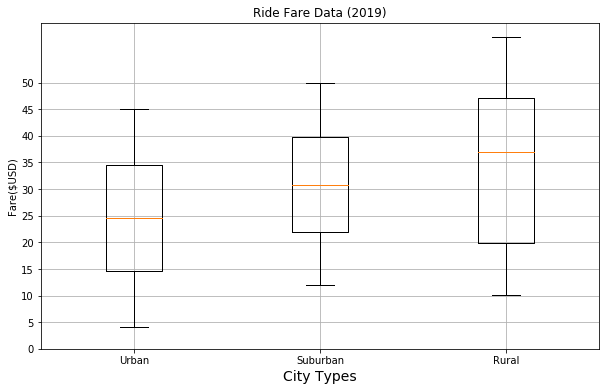

In [571]:
#create box-whisker plot for fares of all city-types
figure,ax=plt.subplots(figsize=(10, 6))
ax.boxplot((urban_fares,suburban_fares,rural_fares),labels=("Urban", "Suburban","Rural"))
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
ax.set_xlabel("City Types",fontsize=14)
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()


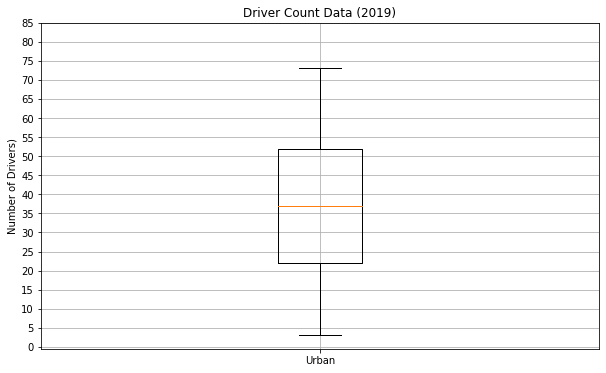

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [572]:
#box-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

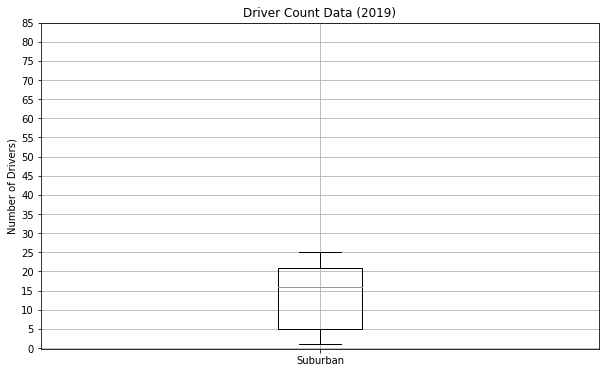

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [573]:
#box-whisker plot for the suburban driver count data
x_labels = ["Suburban"]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

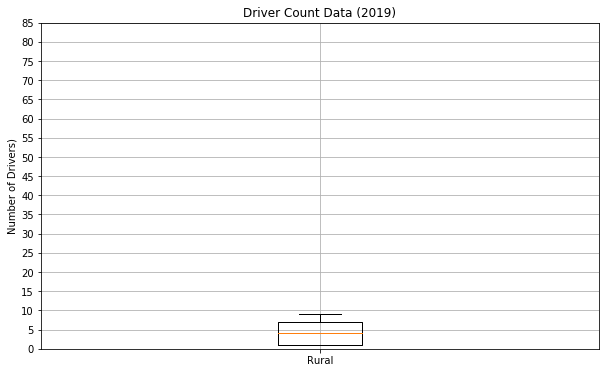

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [574]:
#box-whisker plot for the rural driver count data
x_labels = ["Rural"]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

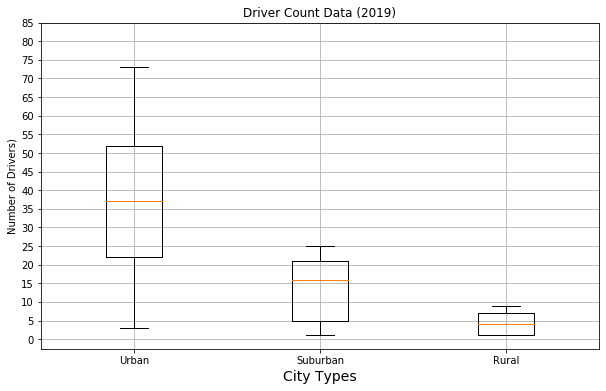

In [575]:
#box-whisker plot of driver_count for all city types
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot((urban_drivers,suburban_drivers,rural_drivers),labels=("Urban", "Suburban","Rural"))
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
# Save the figure
ax.set_xlabel("City Types",fontsize=14)
plt.savefig("analysis/Fig4.png")
plt.show()


In [576]:
#sum of the fares for each city type (returns a Series with city_type as index and sum_fares as data)
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [577]:
#sum of all the fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [578]:
# Calculate the percentage of fare for each city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

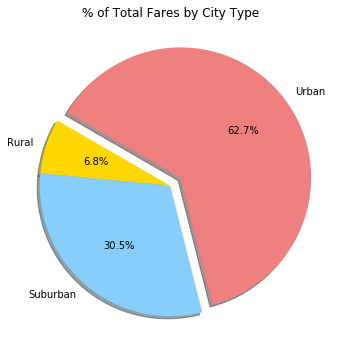

In [579]:
plt.figure(figsize=(10, 6))
plt.pie(type_percents,labels=["Rural", "Suburban", "Urban"],colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title(("% of Total Fares by City Type"))
plt.rcParams['font.size'] = 14

plt.savefig("analysis/Fig5.png")
plt.show()

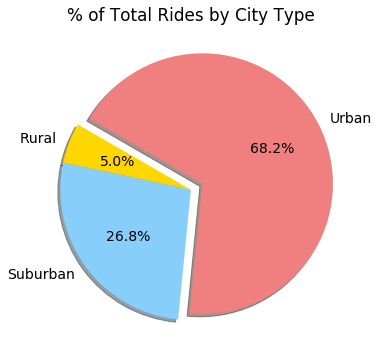

In [580]:
#sum of the rides for each city type (returns a Series with city_type as index and sum_fares as data)
sum_rides_by_type = pyber_data_df.groupby(["type"]).sum()["ride_id"]
sum_rides_by_type

#count of all rides
total_rides = pyber_data_df["fare"].count()
total_rides

# Calculate the percentage of rides for each city type
ride_percents = 100 * sum_rides_by_type / total_rides
ride_percents

# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
plt.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [581]:
#percentage of drivers for each city type
driver_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()
driver_percents


type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

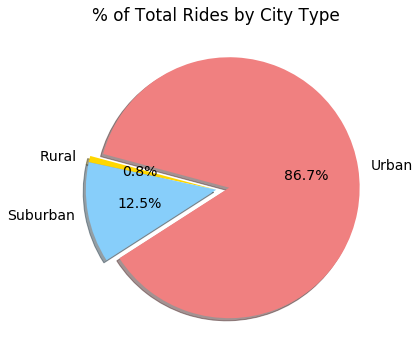

In [582]:
#percentage of rides by city type pie chart
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
plt.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()

In [583]:
#Challenge Part_1
#determine rides, drvers, fares by type using groupby
rides_by_type=pyber_data_df.groupby(['type']).count()['ride_id']
drivers_by_type=city_data_df.groupby(['type']).sum()['driver_count']
fares_by_type=pyber_data_df.groupby(['type']).sum()['fare'].map("${:,.2f}".format)
#avg fare per rider and per driver
avg_fare_per_ride=fares_by_type_df.div(rides_by_type_df).map("${:.2f}".format)
avg_fare_per_driver=fares_by_type_df.div(drivers_by_type).map("${:.2f}".format)
#concatenate series to for new summary df
pyber_summary_df=pd.concat([rides_by_type,drivers_by_type,fares_by_type,avg_fare_per_ride,avg_fare_per_driver],axis=1)
#Remove index name 'type'
pyber_summary_df.index.name=None
#Change column names
pyber_summary_df.columns=['Total Rides','Total Drivers','Total fares','Average Fare per Ride','Average Fare per Driver']
pyber_summary_df.head()

,Total Rides,Total Drivers,Total fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [584]:
#Challenge part_2
#create a copy of pybdr_data and rename columns
pyber_data_copy_df=pyber_data_df.copy()
pyber_data_copy_df.columns=['City', 'Date','Fare','Ride Id','No. Drivers', 'City Type']
#set index to date and show change inplace
pyber_data_copy_df.set_index('Date',inplace=True)
pyber_data_copy_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [592]:
#reset index and check data types with info
pyber_data_copy_df.reset_index(inplace=True)
pyber_data_copy_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        2375 non-null   int64  
 1   Date         2375 non-null   object 
 2   City         2375 non-null   object 
 3   Fare         2375 non-null   float64
 4   Ride Id      2375 non-null   int64  
 5   No. Drivers  2375 non-null   int64  
 6   City Type    2375 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 130.0+ KB


In [593]:
#filter columns to show only those included
pyber_data_copy_updated_df=pyber_data_copy_df.filter(['Date','City', 'Fare','City Type'])
pyber_data_copy_updated_df.head()

,Date,City,Fare,City Type
0,2019-01-14 10:14:22,Lake Jonathanshire,13.83,Urban
1,2019-03-04 18:24:09,South Michelleport,30.24,Urban
2,2019-02-24 04:29:00,Port Samanthamouth,33.44,Urban
3,2019-02-10 23:22:03,Rodneyfort,23.44,Urban
4,2019-03-06 04:28:35,South Jack,34.58,Urban


In [594]:
#sum fares by city using groupby
fares_by_city_type=pyber_data_copy_updated_df.groupby(['City Type']).sum()['Fare'].map("${:,.2f}".format)
fares_by_city_type.head()

City Type
Rural        $4,327.93
Suburban    $19,356.33
Urban       $39,854.38
Name: Fare, dtype: object

In [595]:
#create pivot table
#pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc=’mean’, fill_value=None, margins=False, dropna=True, margins_name=’All’)

new_pivot_table= pyber_data_copy_updated_df.pivot_table('Fare',index='Date',columns='City Type')
new_pivot_table.head()


City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [619]:
#extract subset within specified date range into a new df

#start_date = '2019-01-01'
#end_date = '2019-04-28'
#pivot_filtered=new_pivot_table.loc('2019-07-01 00:08:16')


#TEST WIP create pivot table
#pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc=’mean’, fill_value=None, margins=False, dropna=True, margins_name=’All’)

new_pivot_table= pd.pivot_table(pyber_data_copy_updated_df,index='Date',columns='City Type')
new_pivot_table.head()


Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75